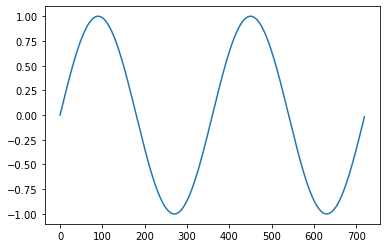

In [5]:
# Differencing to Remove Seasonality
import pandas as pd

from math import sin
from math import radians
from matplotlib import pyplot
# define a dataset with seasonality
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]
pyplot.plot(data)
pyplot.show()

In [2]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [3]:
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

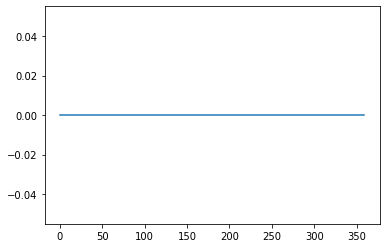

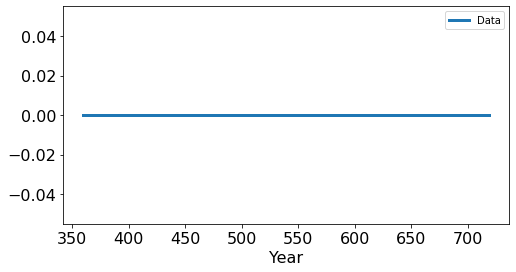

In [7]:
import matplotlib.pyplot as plt

data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]

data_df= pd.DataFrame({'Period' : list(range(0,len(data))),
                       'Data' : data})
data_df.set_index('Period', inplace=True)
data_df.diff(360).plot(figsize=(8,4), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);

# Note that the start position has got change

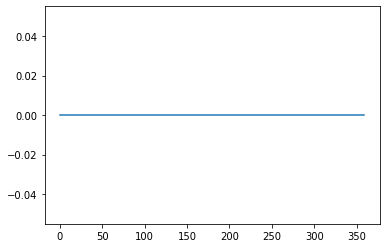

In [13]:
# difference the dataset
diff = difference(data, 360)
pyplot.plot(diff)
pyplot.show()

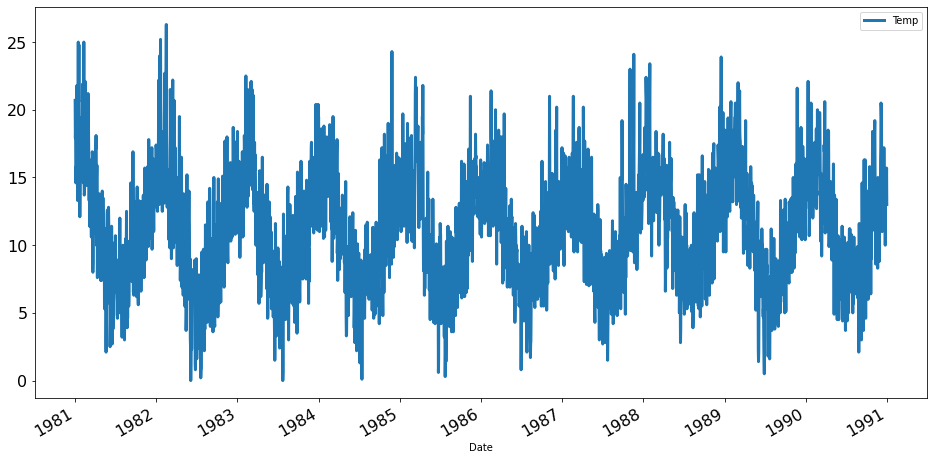

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
series.plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.show()

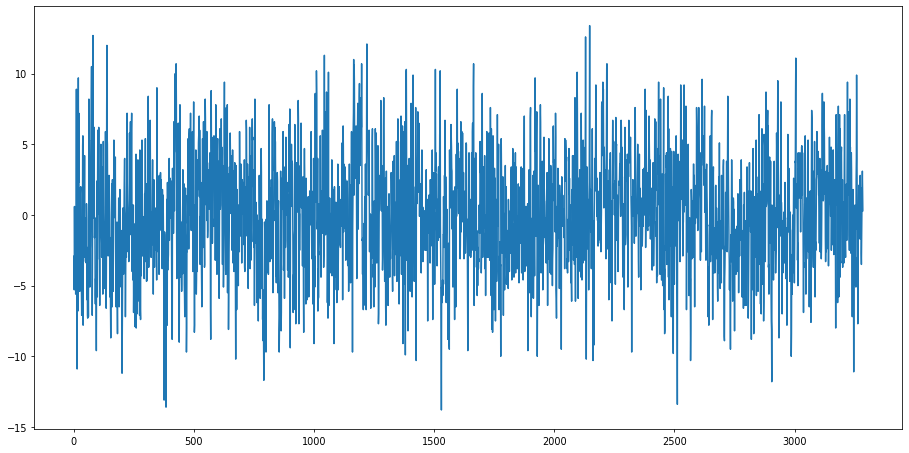

In [15]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)

plt.figure(figsize=(16,8), dpi = 70)
plt.plot(diff)
plt.show()

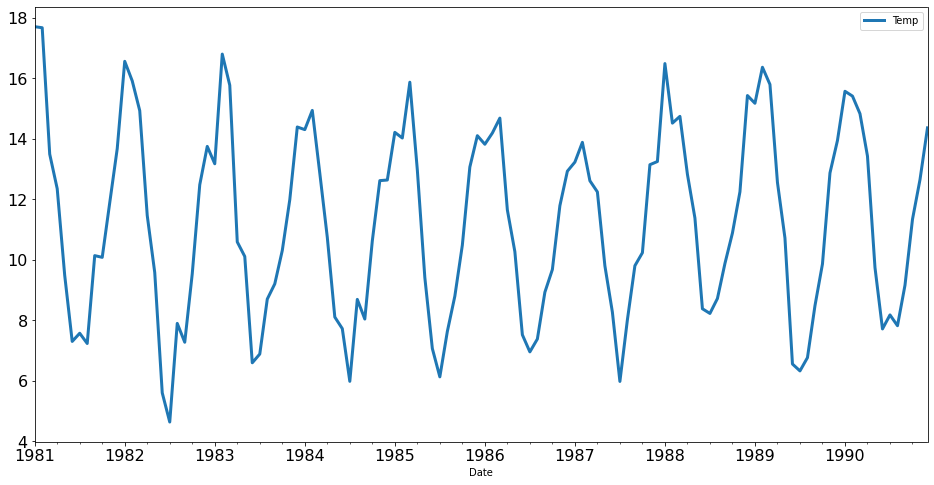

In [16]:
resample = series.resample('M')
monthly_mean = resample.mean()
# print(monthly_mean.head(13))

monthly_mean.plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.show()

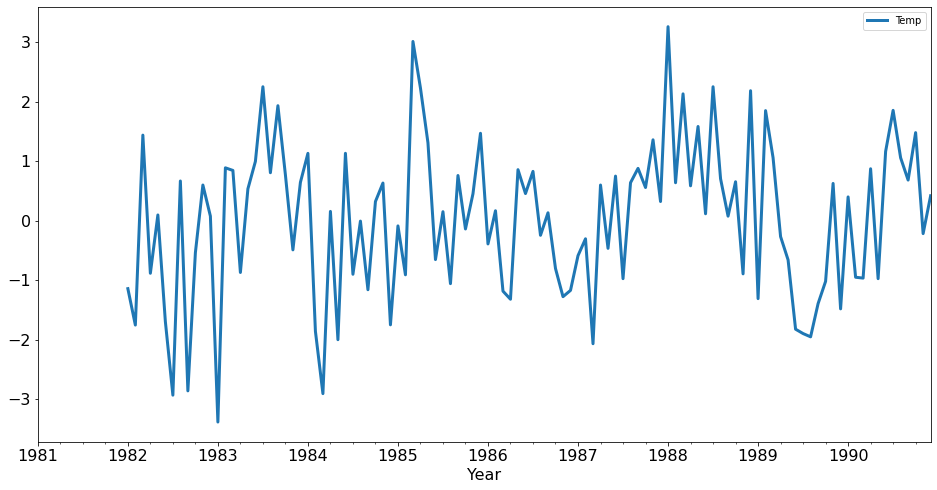

In [17]:
monthly_mean.diff(12).plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);

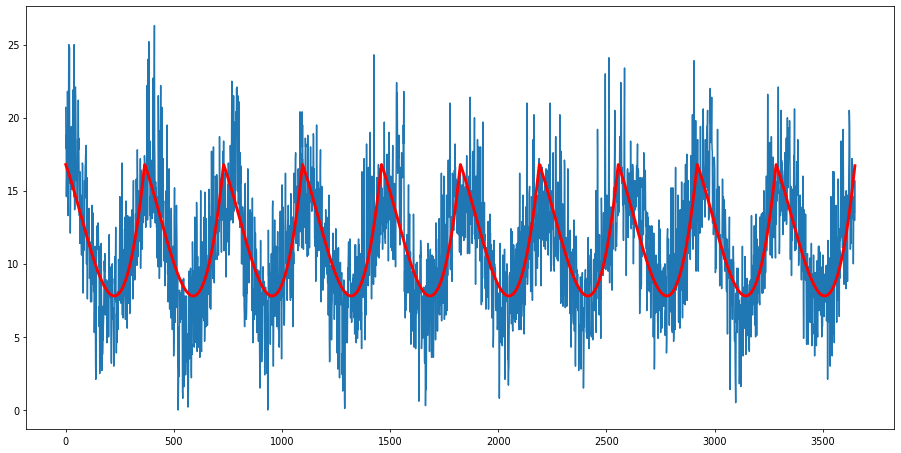

In [21]:
from numpy import polyfit

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 3
coef = polyfit(X, y, degree)
# print('Coefficients: %s' % coef)
# create curve - This the seasonality components.
curve = list()
for i in range(len(X)):
  value = coef[-1]
  for d in range(degree):
    value = value + X[i] ** (degree - d) * coef[d]
  curve.append(value)
# plot curve over original data
plt.figure(figsize=(16,8), dpi = 70)
plt.plot(series.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

In [19]:
coef

array([[-1.17308000e-08],
       [ 9.30253946e-06],
       [-2.15977594e-03],
       [ 1.19147966e-01],
       [ 1.38980178e+01]])

In [ ]:
y = b0.x0 + b1.x1 + b2.x2 + b3.x3 + b4.x4

y = c + m.x
y = b0.x0 + b1.x1

In [20]:
degree = 3
coef = polyfit(X, y, degree)

coef

array([[ 7.62517072e-07],
       [-1.63232331e-04],
       [-4.18345059e-02],
       [ 1.67917169e+01]])

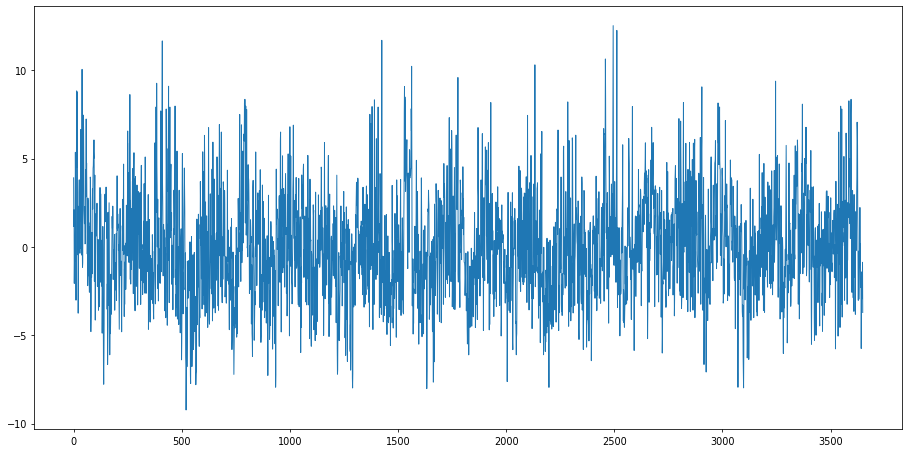

In [22]:
# create seasonally adjusted - we are removing the seasonality components
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
 
plt.figure(figsize=(16,8), dpi = 70)
plt.plot(diff, linewidth=1)
plt.show()

In [23]:
import pandas as pd

time_data = pd.read_csv("multiTimeline.csv", skiprows=1)

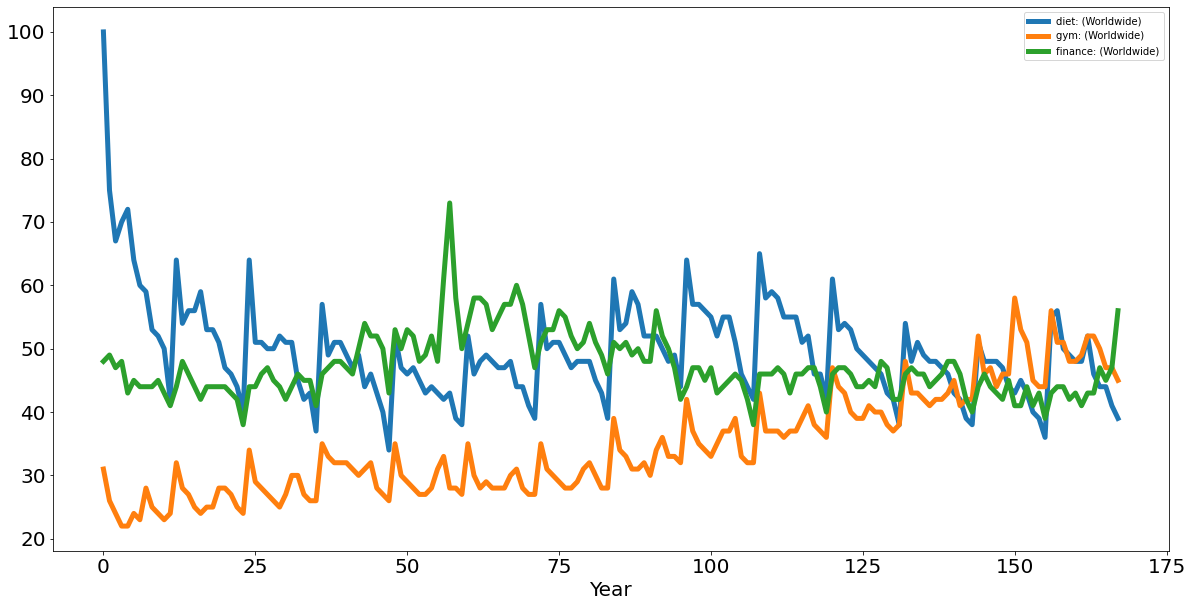

In [24]:
time_data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [25]:
# This will not give accurate result
time_data.corr()

,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
diet: (Worldwide),1.000000,-0.100764,-0.034639
gym: (Worldwide),-0.100764,1.000000,-0.284279
finance: (Worldwide),-0.034639,-0.284279,1.000000


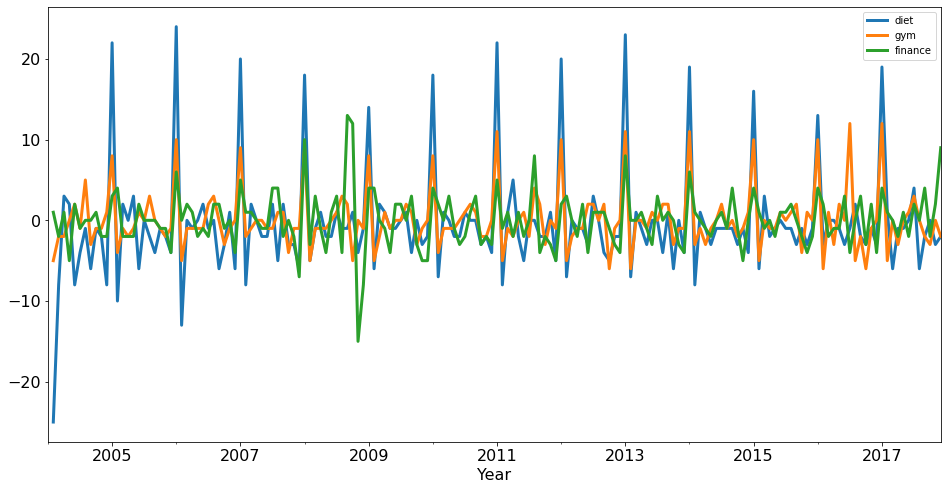

In [28]:
time_data.columns = ['month', 'diet', 'gym', 'finance']
# Setting the Month to index

time_data.month = pd.to_datetime(time_data.month)
time_data.set_index('month', inplace=True)


time_data.diff().plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);

In [29]:
time_data.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


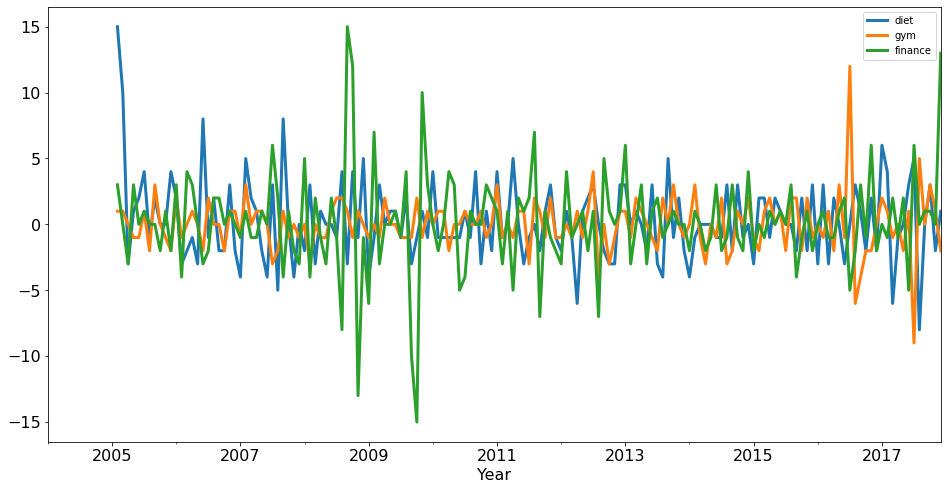

In [30]:
new_data = pd.DataFrame(time_data.diff())
new_data.diff(12).plot(figsize=(16,8), linewidth=3, fontsize=16)
plt.xlabel('Year', fontsize=16);

In [31]:
new_data.diff(12).corr()

,diet,gym,finance
diet,1.000000,-0.040351,0.045726
gym,-0.040351,1.000000,-0.115657
finance,0.045726,-0.115657,1.000000


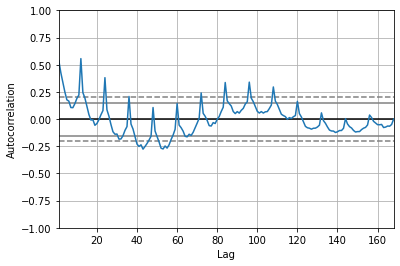

In [35]:
diet = time_data[['diet']]

pd.plotting.autocorrelation_plot(diet)

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


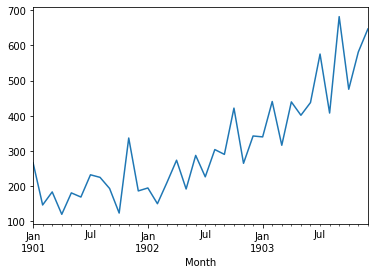

In [36]:
# Monthly number of sales of shampoo over a 3 year period
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
plt.show()

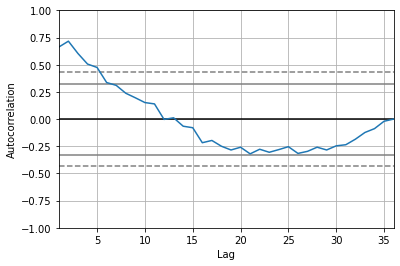

In [37]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

We can observe positive correlation till 10-12 lags that is perhaps significant for the first 5 lags.

A good starting point for the AR parameter of the model may be 5.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


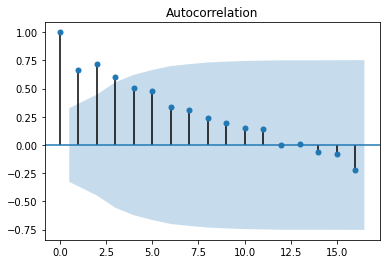

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series)
plt.show()

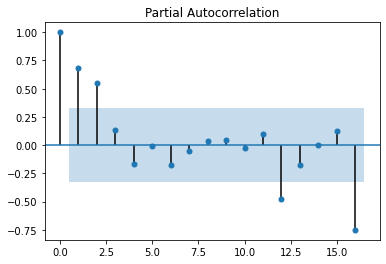

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(series)
plt.show()

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/